# 1. IMPORTS & SETUP

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOAD DATA

In [2]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"
data = pd.read_csv(url)

# Preview the first few rows
print(data.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

# 3. EXPLORATORY DATA ANALYSIS (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

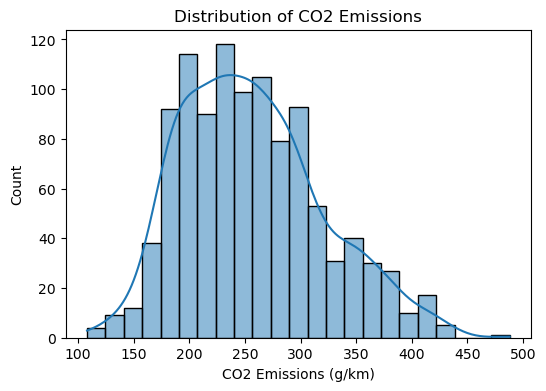

In [3]:
# Show data info, summary statistics, and check for missing values
print(data.info())
print(data.describe())
print("Missing values:\n", data.isnull().sum())

#Visualize target distribution
plt.figure(figsize=(6,4))
sns.histplot(data['CO2EMISSIONS'], kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.show()

# 4. FEATURE SELECTION & PREPROCESSING

In [4]:
# For this exercise, let's use numerical features only for KNN (KNN does not handle categoricals without encoding)
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
target = 'CO2EMISSIONS'

X = data[features]
y = data[target]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. MODEL TRAINING(KNN & LinearRegression)

In [22]:
# Instantiate KNN regressor (default k=5)
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [21]:
# Instantiate Linear Regression
model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

LinearRegression()

# 6. PREDICTION & Metrics for KNN and Linear Regression

In [10]:
def mean_absolute_percentage_error(y_true, y_pred):  # scikit-learn < 1.1 doesn't have this built-in
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## 6.1 KNN metrics

In [24]:
# KNN metrics
knn_pred = model_knn.predict(X_test_scaled)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
knn_r2 = r2_score(y_test, knn_pred)
knn_mape = mean_absolute_percentage_error(y_test, knn_pred)

C:\Users\heman\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 6.2 Linear Regression metrics

In [23]:
# Linear Regression metrics
linreg_pred = model_linreg.predict(X_test_scaled)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_rmse = mean_squared_error(y_test, linreg_pred, squared=False)
linreg_r2 = r2_score(y_test, linreg_pred)
linreg_mape = mean_absolute_percentage_error(y_test, linreg_pred)

C:\Users\heman\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# Compare in a DataFrame for clarity
results = pd.DataFrame({
    'Model': ['KNN', 'Linear Regression'],
    'MAE': [knn_mae, linreg_mae],
    'MSE': [knn_mse, linreg_mse],
    'RMSE': [knn_rmse, linreg_rmse],
    'R2': [knn_r2, linreg_r2],
    'MAPE': [knn_mape, linreg_mape]
})

print(results)

               Model        MAE         MSE       RMSE        R2      MAPE
0                KNN   5.615888  130.250280  11.412724  0.968500  2.333876
1  Linear Regression  16.721594  512.855137  22.646305  0.875971  7.008169


# 7 Model interpretation

In [27]:
# INTERPRETATION: WHICH MODEL IS BETTER?

print("Comparison Table:\n", results)

best_model = results.loc[results['RMSE'].idxmin(), 'Model']
print(f"\nModel with lowest RMSE: {best_model}")

# Quick explanation for the user
print(
    "\nHow to interpret:\n"
    "- Lower MAE, MSE, RMSE, and MAPE = better (closer to 0).\n"
    "- Higher R² (closer to 1) = better model fit.\n"
    "- In practice, focus on RMSE and R² for regression.\n"
    "- Double-check for negative R² or very high errors (could signal data issues or poor fit).\n"
)

# Optional: Give a plain language summary
if knn_rmse < linreg_rmse:
    print("KNN performed better in terms of RMSE (closer predictions).")
elif linreg_rmse < knn_rmse:
    print("Linear Regression performed better in terms of RMSE.")
else:
    print("Both models performed similarly.")

Comparison Table:
                Model        MAE         MSE       RMSE        R2      MAPE
0                KNN   5.615888  130.250280  11.412724  0.968500  2.333876
1  Linear Regression  16.721594  512.855137  22.646305  0.875971  7.008169

Model with lowest RMSE: KNN

How to interpret:
- Lower MAE, MSE, RMSE, and MAPE = better (closer to 0).
- Higher R² (closer to 1) = better model fit.
- In practice, focus on RMSE and R² for regression.
- Double-check for negative R² or very high errors (could signal data issues or poor fit).

KNN performed better in terms of RMSE (closer predictions).
